In [1]:
import os.path as path_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = 'data'
submit_path = 'submits'
seed = 110894

In [4]:
df_second_group_sku = pd.read_csv(path_.join(data_path, 'second_group_sku.csv'))
df_second_group_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          3749 non-null   object 
 1   SKU            3749 non-null   int64  
 2   price_per_sku  3749 non-null   float64
 3   num_purchases  3749 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 117.3+ KB


In [5]:
df_second_group_sku['dates'] = pd.to_datetime(df_second_group_sku['dates'])

In [6]:
df_promo = pd.read_csv(path_.join(data_path, 'promo_1510002.csv'))
df_promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      52 non-null     int64  
 1   week_num  52 non-null     int64  
 2   SKU       52 non-null     int64  
 3   discount  52 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.8 KB


In [7]:
df_second_group_sku['SKU'].nunique(), df_second_group_sku['SKU'].unique()

(13,
 array([10334, 17812, 36096, 38767, 43678, 57561, 64619, 68211, 69997,
        72784, 83329, 90611, 98255]))

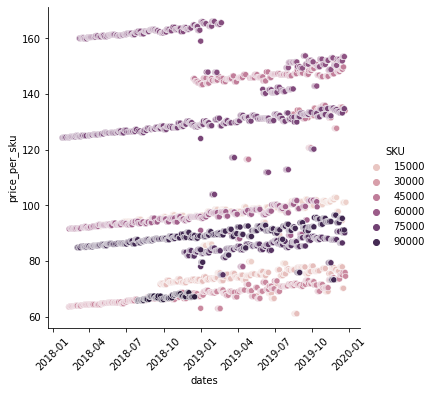

In [7]:
_ = sns.relplot(x='dates', y='price_per_sku', hue='SKU', data=df_second_group_sku)
_ = plt.xticks(rotation=45)

In [8]:
df_second_group_sku['year'] = df_second_group_sku['dates'].dt.year
df_second_group_sku['week_num'] = df_second_group_sku['dates'].dt.week

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [9]:
df_joined = df_second_group_sku.merge(df_promo, on=['SKU', 'year', 'week_num'], how='left')
df_joined.head()

,dates,SKU,price_per_sku,num_purchases,year,week_num,discount
0,2018-04-19,10334,92.890,10,2018,16,NaN
1,2018-04-20,10334,92.890,11,2018,16,NaN
2,2018-04-21,10334,92.890,10,2018,16,NaN
3,2018-04-22,10334,92.890,12,2018,16,NaN
4,2018-04-23,10334,92.456,10,2018,17,NaN


In [10]:
(
    df_promo
    .groupby('SKU', as_index=False)
    .agg({'discount': 'count'})
    .rename(columns={'discount': 'promo_count'})
    .to_csv(
        path_.join(submit_path, 'second_sku_promo_count.csv'),
        index=False,
    )
)

In [11]:
df_purchases = pd.DataFrame(
    (
        df_joined
        .groupby(by=['SKU', df_joined['discount'].isna()])
        .agg({
            'num_purchases': 'mean',
        })
        .unstack(level=1)
        .reset_index()
        .values
    ),
    columns=['SKU', 'mean_num_purchases_promo', 'mean_num_purchases_wo_promo'],
)
df_purchases = df_purchases.astype({'SKU': int})
df_purchases.head()

,SKU,mean_num_purchases_promo,mean_num_purchases_wo_promo
0,10334,11.977778,9.980050
1,17812,5.934783,3.613636
2,36096,12.923077,11.414634
3,38767,10.222222,9.000000
4,43678,12.090909,9.448276


In [12]:
(
    df_purchases
    .to_csv(
        path_.join(submit_path, 'second_sku_sales_comparison.csv'),
        index=False,
    )
)

In [13]:
df_purchases['promo_diff'] = (df_purchases['mean_num_purchases_promo'] - df_purchases['mean_num_purchases_wo_promo']).abs()

In [14]:
df_purchases.sort_values('promo_diff', ascending=False).head(1)

,SKU,mean_num_purchases_promo,mean_num_purchases_wo_promo,promo_diff
8,69997,7.818182,4.333333,3.484848
